<a href="https://colab.research.google.com/github/vishalthorat03/Python/blob/Data-Science-and-Analytics/FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
# Load the dataset
data_url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
df = pd.read_csv(data_url)

In [3]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  fl

In [4]:
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  

In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


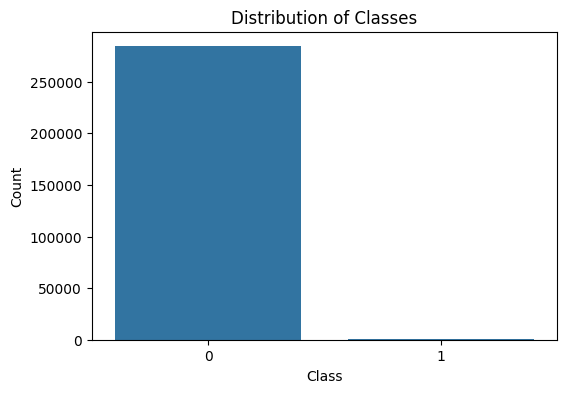

In [6]:
# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

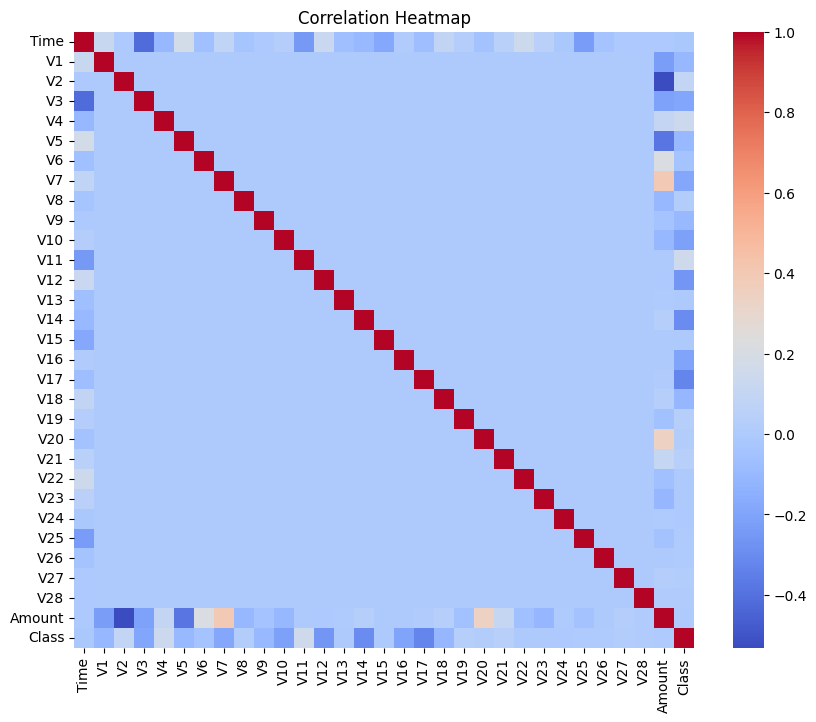

In [7]:
# Plot correlations heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# Drop any columns that are not necessary for analysis
df.drop(['Time'], axis=1, inplace=True)

In [9]:
# Splitting the dataset into features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [10]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# Feature scaling - Standardization
scaler = StandardScaler()
X_train['Amount'] = scaler.fit_transform(X_train['Amount'].values.reshape(-1, 1))
X_test['Amount'] = scaler.transform(X_test['Amount'].values.reshape(-1, 1))

In [12]:
# Deep Learning Model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# Training the model
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/20
1425/1425 [==============================] - 11s 6ms/step - loss: 0.0401 - accuracy: 0.9928 - val_loss: 0.0058 - val_accuracy: 0.9982
Epoch 2/20
1425/1425 [==============================] - 7s 5ms/step - loss: 0.0079 - accuracy: 0.9985 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 3/20
1425/1425 [==============================] - 3s 2ms/step - loss: 0.0062 - accuracy: 0.9988 - val_loss: 0.0046 - val_accuracy: 0.9989
Epoch 4/20
1425/1425 [==============================] - 3s 2ms/step - loss: 0.0054 - accuracy: 0.9988 - val_loss: 0.0046 - val_accuracy: 0.9993
Epoch 5/20
1425/1425 [==============================] - 4s 3ms/step - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.0042 - val_accuracy: 0.9991
Epoch 6/20
1425/1425 [==============================] - 3s 2ms/step - loss: 0.0053 - accuracy: 0.9988 - val_loss: 0.0041 - val_accuracy: 0.9994
Epoch 7/20
1425/1425 [==============================] - 3s 2ms/step - loss: 0.0051 - accuracy: 0.9988 - val_loss: 0.0040 - val_accuracy

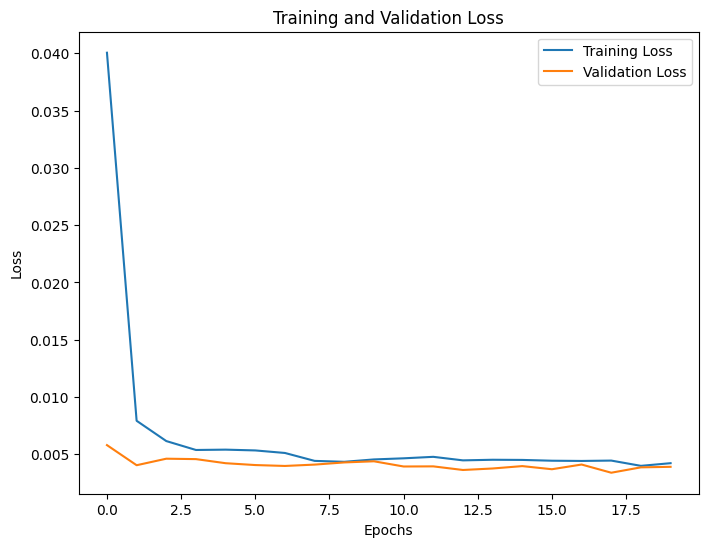

In [14]:
# Plotting the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
# Predicting probabilities on the test set
y_pred_prob = model.predict(X_test)

# Thresholding probabilities to get binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)




1781/1781 [==============================] - 2s 1ms/step


In [16]:
# Classification report and Confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.77      0.78        98

    accuracy                           1.00     56962
   macro avg       0.90      0.88      0.89     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
[[56845    19]
 [   23    75]]


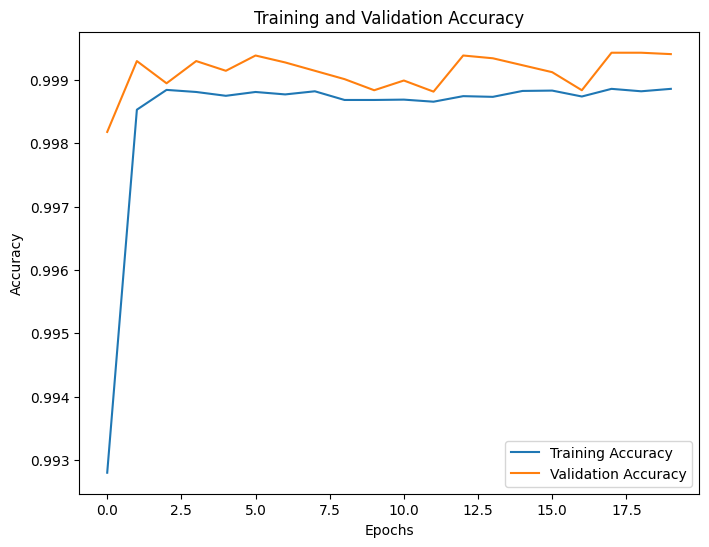

In [17]:
# Plotting the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

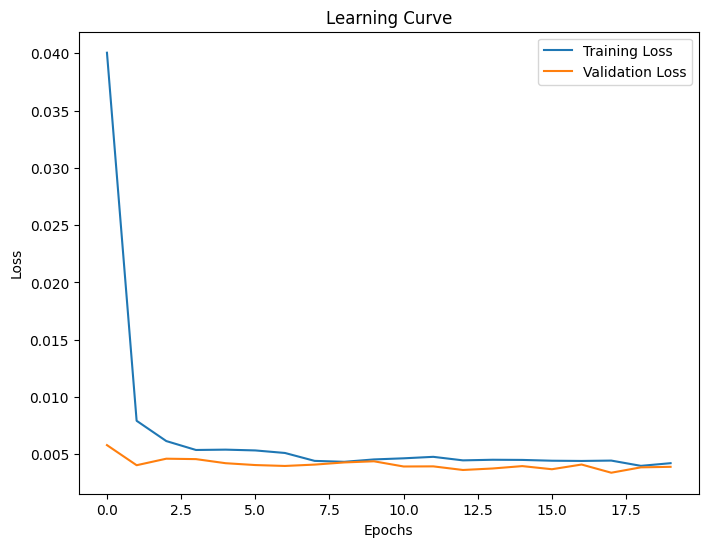

In [18]:
# Plotting the learning curve (training loss vs. validation loss)
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Printing results in tabular format
results = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T
print("Classification Report:")
print(results)

Classification Report:
              precision    recall  f1-score       support
0              0.999596  0.999666  0.999631  56864.000000
1              0.797872  0.765306  0.781250     98.000000
accuracy       0.999263  0.999263  0.999263      0.999263
macro avg      0.898734  0.882486  0.890440  56962.000000
weighted avg   0.999249  0.999263  0.999255  56962.000000


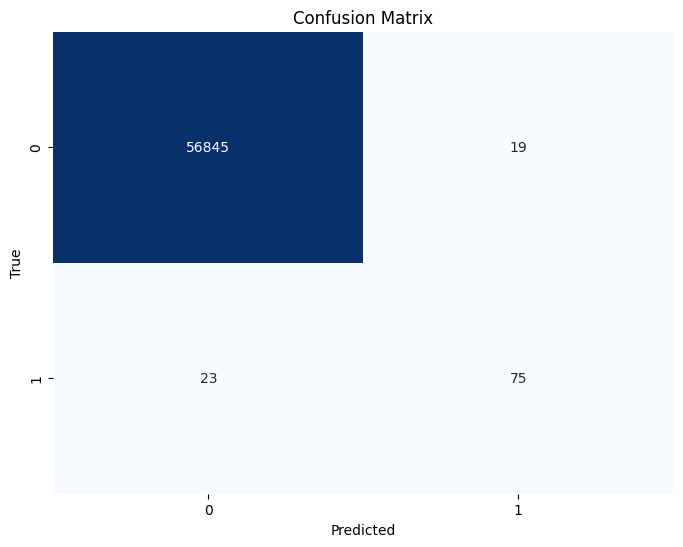

In [20]:
# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

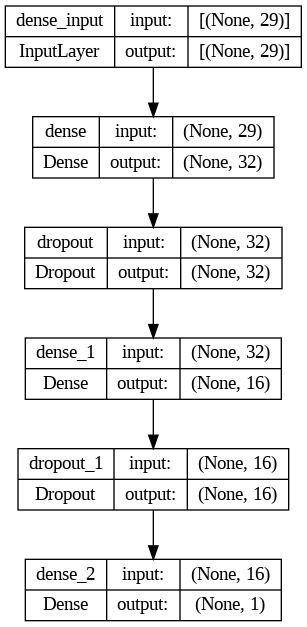

In [21]:
from tensorflow.keras.utils import plot_model

# Visualize the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
